#### **Agenda:**
   - Recognition of world famous landmark
   - Standard CNN architecture like AlexNet and VGGNet
   - Transfer learning using VGGNet


###Problem Statement:

- Suppose you are working as Data Scientist in Google. You have been given with a task to automate the categorization of famous landmarks.

<center><img src='https://drive.google.com/uc?id=1-AXpfjw6eCpFvJRlbV5GGXnzCmin6vmL' ></center>

- The dataset is obtained by downloading the images of the 10 famous landmark from Google search.
- Using these images, you have to train a CNN model 
- For inference, the CNN model will be fed with an image like Google lens and it will output the most probable landmark category

### What is google lens ?

Please follow this who are not familiar : https://lens.google/


 

### What should be the performance metric ?
Accuracy is obtained by dividing the number of correct predictions  by the total number of samples


### Importing python package

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import random

plt.rcParams.update({'font.size': 14})

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


### Downloading the dataset

In [2]:
#!gdown 11LQILlalZGi_skLIipnpTyh-At77B_j6

In [3]:
#!unzip New_landmark_images.zip

In [5]:
train_data = tf.keras.utils.image_dataset_from_directory("D:\\tensorflow\\New_landmark_images\\New_landmark_images\\train",shuffle =True, seed=123,image_size=(227, 227),batch_size=32)
val_data   = tf.keras.utils.image_dataset_from_directory("D:\\tensorflow\\New_landmark_images\\New_landmark_images\\validation",shuffle =False, seed=123,image_size=(227, 227),batch_size=32)
test_data = tf.keras.utils.image_dataset_from_directory("D:\\tensorflow\\New_landmark_images\\New_landmark_images\\test",shuffle =False, seed=123,image_size=(227, 227),batch_size=32)

from tensorflow.keras import layers 
data_preprocess = tf.keras.Sequential(
    name="data_preprocess",
    layers=[ layers.Rescaling(1.0/255),]
)

# Perform Data Processing on the train, val, test dataset
train_ds = train_data.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess(x), y))

Found 737 files belonging to 10 classes.
Found 155 files belonging to 10 classes.
Found 43 files belonging to 10 classes.


In [6]:
print(train_data.class_names)

['01.Niagara_Falls', '02.Golden_Gate_Bridge', '03.Kantanagar_Temple', '04.Eiffel_Tower', '05.Washington_Monument', '06.Hanging_Temple', '07.Forth_Bridge', '08.Gateway_of_India', '09.Machu_Picchu', '10.Great_Wall_of_China']


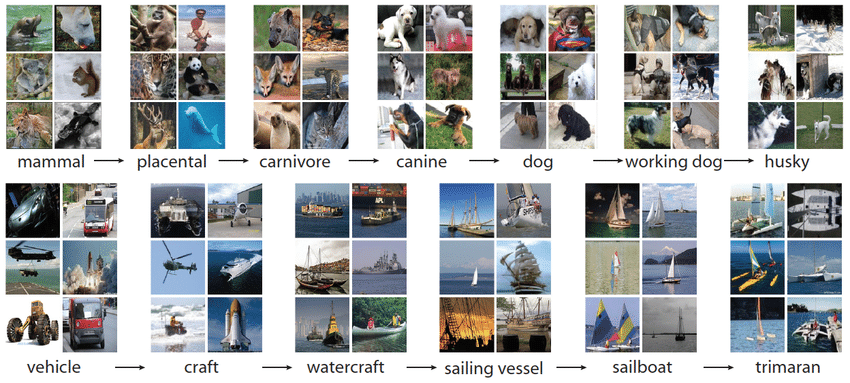

### Data Processing: Resizing, Standardization
- The input image is resized to (224,224,3) because VGGNet expects input image to be of (224,224,3) in size
- Also, we rescale the pixel values to lie between 0 and 1 by dividing it with 255. (since pixel values range from 0 to 255)


In [8]:
BATCH_SIZE = 128
tf.random.set_seed(10)
np.random.seed(10)
train_ds = tf.keras.utils.image_dataset_from_directory("D:\\tensorflow\\New_landmark_images\\New_landmark_images\\train",shuffle =True, seed=123,image_size=(224, 224),batch_size=BATCH_SIZE)
val_ds   = tf.keras.utils.image_dataset_from_directory("D:\\tensorflow\\New_landmark_images\\New_landmark_images\\validation",shuffle =False, seed=123,image_size=(224, 224),batch_size=BATCH_SIZE)
test_ds = tf.keras.utils.image_dataset_from_directory("D:\\tensorflow\\New_landmark_images\\New_landmark_images\\test",shuffle =False, seed=123,image_size=(224, 224),batch_size=BATCH_SIZE)
from tensorflow.keras import layers 
data_preprocess = tf.keras.Sequential(
    name="data_preprocess",
    layers=[ layers.Rescaling(1.0/255),]
)

# Perform Data Processing on the train, val, test dataset
train_ds = train_ds.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_ds.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_ds.map(lambda x, y: (data_preprocess(x), y))

Found 737 files belonging to 10 classes.
Found 155 files belonging to 10 classes.
Found 43 files belonging to 10 classes.


In [9]:
# VGG 16 Model
# If the commented Conv2D layer is uncommented then it becomes VGG 19 
# FC layers are commented so that faster training occur
vgg16_model = tf.keras.Sequential([
        tf.keras.layers.Input(shape = (224 ,224, 3)),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

        tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

        tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),

        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

        tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),

        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

        tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding= 'same',
                        activation= 'relu'),

        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(10, activation= 'softmax')
        ])

In [10]:
vgg16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [11]:
import functools
from tensorflow.keras.optimizers import Adam,SGD
top5_acc = functools.partial(tf.keras.metrics.SparseTopKCategoricalAccuracy())

opt = SGD(learning_rate=0.005, momentum=0.99)
vgg16_model.compile(optimizer=opt,loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
print(vgg16_model.optimizer.get_config())
history = vgg16_model.fit(train_ds,epochs=5,validation_data=val_ds)

{'name': 'SGD', 'learning_rate': 0.005, 'decay': 0.0, 'momentum': 0.99, 'nesterov': False}
Epoch 1/5
6/6 [==============================] - 283s 46s/step - loss: 2.3026 - accuracy: 0.0882 - val_loss: 2.3025 - val_accuracy: 0.1032
Epoch 2/5
6/6 [==============================] - 315s 54s/step - loss: 2.3016 - accuracy: 0.1167 - val_loss: 2.3025 - val_accuracy: 0.1032
Epoch 3/5
6/6 [==============================] - 298s 50s/step - loss: 2.2999 - accuracy: 0.1194 - val_loss: 2.3027 - val_accuracy: 0.1032
Epoch 4/5
6/6 [==============================] - 305s 51s/step - loss: 2.2980 - accuracy: 0.1194 - val_loss: 2.3033 - val_accuracy: 0.1032
Epoch 5/5
6/6 [==============================] - 311s 52s/step - loss: 2.2963 - accuracy: 0.1194 - val_loss: 2.3049 - val_accuracy: 0.1032


In [13]:
# Saving the Model
vgg16_model.save("D:\\tensorflow\\New_landmark_images\\vgg16_model_scratch.h5")

In [14]:
#Loading the model
vgg16_model_scratch = tf.keras.models.load_model("D:\\tensorflow\\New_landmark_images\\vgg16_model_scratch.h5")

In [15]:
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric], ls='dashed')
        ax[idx].set_xlabel("Epochs")
        ax[idx].set_ylabel(metric)
        ax[idx].plot(history.history['val_' + metric])
        ax[idx].legend([metric, 'val_' + metric])

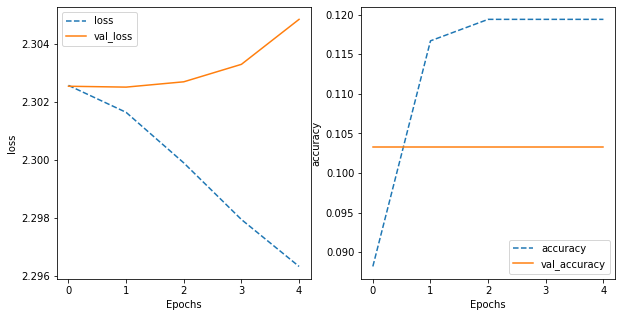

In [16]:
training_plot(['loss', 'accuracy'], history)

In [17]:
# Evaluate the model
loss, acc = vgg16_model_scratch.evaluate(test_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

1/1 - 4s - loss: 2.3041 - accuracy: 0.1163 - 4s/epoch - 4s/step
Restored model, accuracy: 11.63%


In [18]:
pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=[224,224, 3])
pretrained_model.trainable=False
vgg16_model = tf.keras.Sequential([pretrained_model,tf.keras.layers.Flatten(),tf.keras.layers.Dense(10, activation='softmax')])

58889256/58889256 [==============================] - 5s 0us/step


In [19]:
vgg16_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                250890    
                                                                 
Total params: 14,965,578
Trainable params: 250,890
Non-trainable params: 14,714,688
_________________________________________________________________


In [20]:
import functools
top5_acc = functools.partial(tf.keras.metrics.SparseTopKCategoricalAccuracy())
vgg16_model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
history = vgg16_model.fit(train_ds, epochs=5,validation_data=val_ds)

Epoch 1/5
6/6 [==============================] - 87s 15s/step - loss: 2.4012 - accuracy: 0.2456 - val_loss: 1.6077 - val_accuracy: 0.5871
Epoch 2/5
6/6 [==============================] - 98s 17s/step - loss: 1.0682 - accuracy: 0.7001 - val_loss: 0.7704 - val_accuracy: 0.7355
Epoch 3/5
6/6 [==============================] - 97s 17s/step - loss: 0.4569 - accuracy: 0.8711 - val_loss: 0.6433 - val_accuracy: 0.8258
Epoch 4/5
6/6 [==============================] - 99s 17s/step - loss: 0.3141 - accuracy: 0.9267 - val_loss: 0.4948 - val_accuracy: 0.8129
Epoch 5/5
6/6 [==============================] - 97s 16s/step - loss: 0.1970 - accuracy: 0.9579 - val_loss: 0.5019 - val_accuracy: 0.8387


In [22]:
# Saving the Model
vgg16_model_pretrained = vgg16_model.save("D:\\tensorflow\\New_landmark_images\\vgg16_model_pretrained.h5")

In [23]:
# Download the saved model from Google Drive
#!gdown 15SJVnO_XxBnHWy98kJe4k6sQ1u3a6tnA

#Loading the model
vgg16_model_pretrained = tf.keras.models.load_model("D:\\tensorflow\\New_landmark_images\\vgg16_model_pretrained.h5")

In [24]:
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric], ls='dashed')
        ax[idx].set_xlabel("Epochs")
        ax[idx].set_ylabel(metric)
        ax[idx].plot(history.history['val_' + metric]);
        ax[idx].legend([metric, 'val_' + metric])

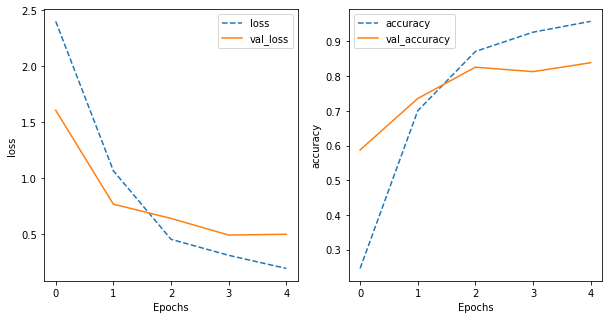

In [25]:
training_plot(['loss', 'accuracy'], history)

In [ ]:
# Evaluate the model
loss, acc = vgg16_model_pretrained.evaluate(test_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

1/1 - 1s - loss: 0.6303 - accuracy: 0.7907 - 548ms/epoch - 548ms/step
Restored model, accuracy: 79.07%


In [27]:
def plot_image(pred_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(pred_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label],
                                100*np.max(pred_array),
                                ),
                                color=color)

Now, let's visualize the model prediction on the test dataset

1/1 [==============================] - 12s 12s/step


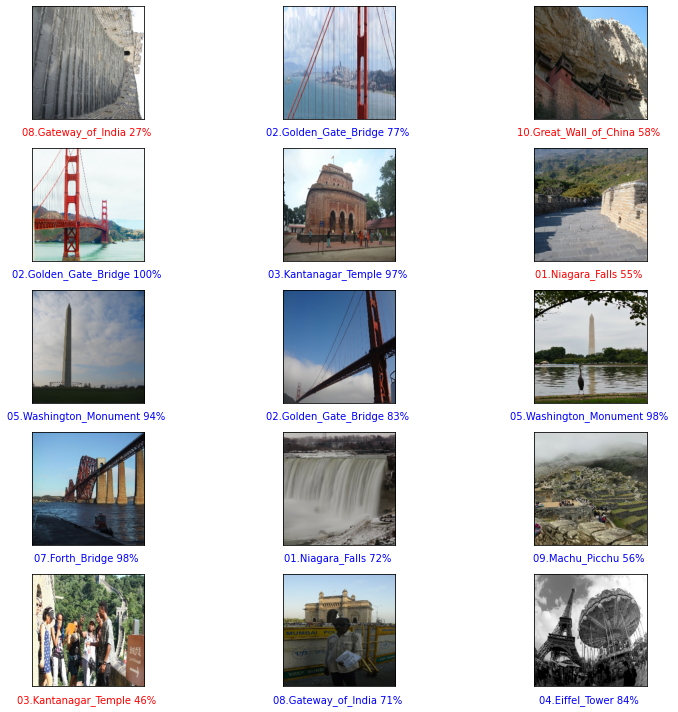

In [28]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)
images = tf.concat([x for x, y in test_ds], axis=0)
y_pred = vgg16_model.predict(test_ds)
class_names = test_data.class_names

# Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
indices = random.sample(range(len(images)), 15)
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(4*num_cols, 2*num_rows))
for i,index in enumerate(indices):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(y_pred[index], true_categories[index], images[index])

plt.tight_layout()
plt.show()